# Homework 6

Name: Kavana Manvi Krishnamuthy

ID: 2158984

In [4]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


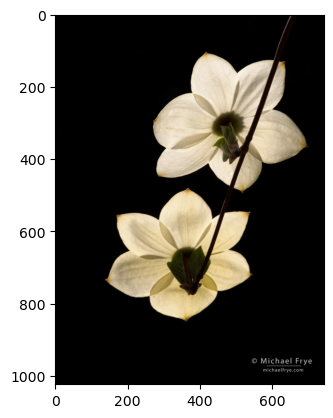

In [5]:
image1 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW6/Image1.jpeg")
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image1_rgb)

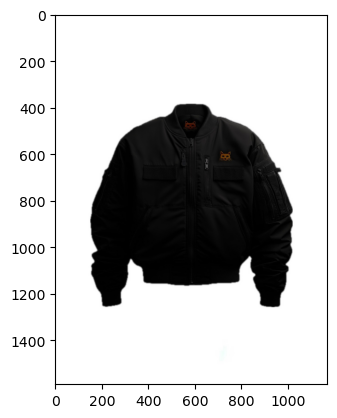

In [6]:
image2 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW6/Image2.jpeg")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image2_rgb)

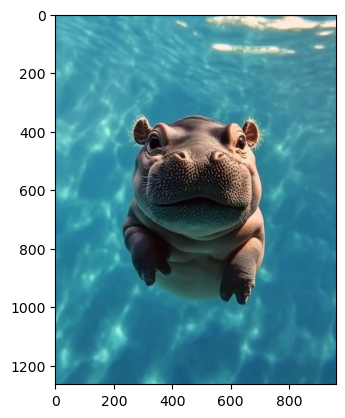

In [7]:
image3 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW6/Image3.jpeg")
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image3_rgb)

## Part 1 – Erosion and Dilation

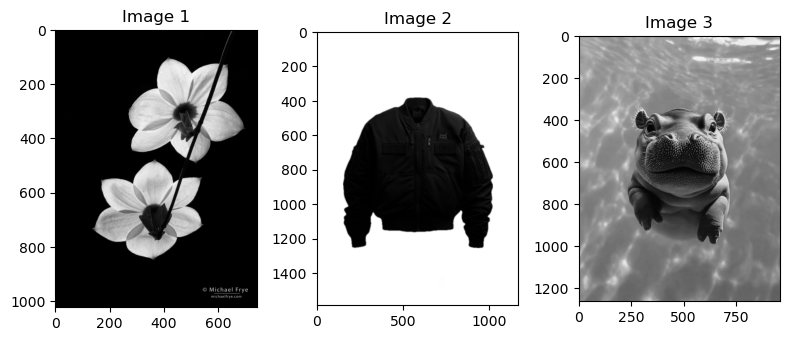

In [18]:
image1_gray = cv2.cvtColor(image1_rgb, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2_rgb, cv2.COLOR_BGR2GRAY)
image3_gray = cv2.cvtColor(image3_rgb, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 5))

plt.subplot(131), plt.imshow(image1_gray, cmap='gray'), plt.title('Image 1')
plt.subplot(132), plt.imshow(image2_gray, cmap='gray'), plt.title('Image 2')
plt.subplot(133), plt.imshow(image3_gray, cmap='gray'), plt.title('Image 3')

plt.tight_layout() 
plt.show()

In [10]:
import numpy as np

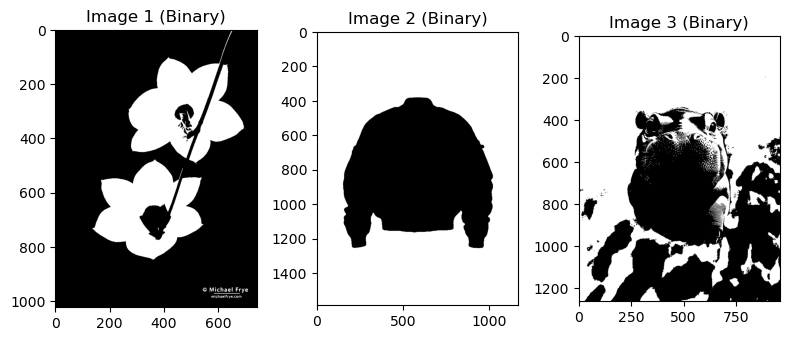

In [20]:
_, binary1 = cv2.threshold(image1_gray, image1_gray.mean(), 255, cv2.THRESH_BINARY)
_, binary2 = cv2.threshold(image2_gray, image2_gray.mean(), 255, cv2.THRESH_BINARY)
_, binary3 = cv2.threshold(image3_gray, image3_gray.mean(), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 5))
plt.subplot(131), plt.imshow(binary1, cmap='gray'), plt.title('Image 1 (Binary)')
plt.subplot(132), plt.imshow(binary2, cmap='gray'), plt.title('Image 2 (Binary)')
plt.subplot(133), plt.imshow(binary3, cmap='gray'), plt.title('Image 3 (Binary)')

plt.tight_layout()
plt.show()

In [12]:
morph_rect_se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

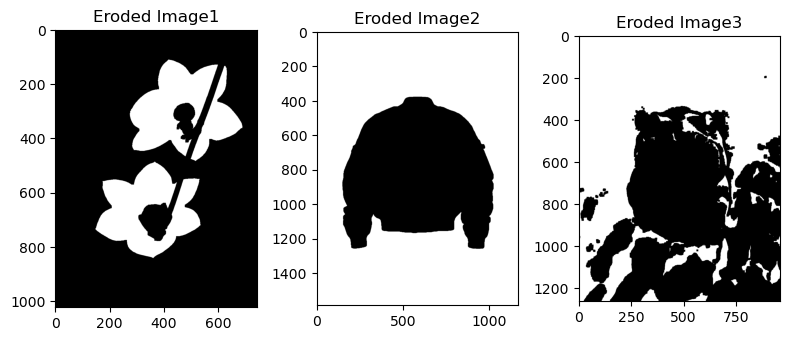

In [24]:
eroded_bin_image1 = cv2.erode(binary1, morph_rect_se, iterations=2)
eroded_bin_image2 = cv2.erode(binary2, morph_rect_se, iterations=2)
eroded_bin_image3 = cv2.erode(binary3, morph_rect_se, iterations=2)

plt.figure(figsize=(8, 5))
plt.subplot(131), plt.imshow(eroded_bin_image1, cmap='gray'), plt.title('Eroded Image1')
plt.subplot(132), plt.imshow(eroded_bin_image2, cmap='gray'), plt.title('Eroded Image2')
plt.subplot(133), plt.imshow(eroded_bin_image3, cmap='gray'), plt.title('Eroded Image3')

plt.tight_layout()
plt.show()

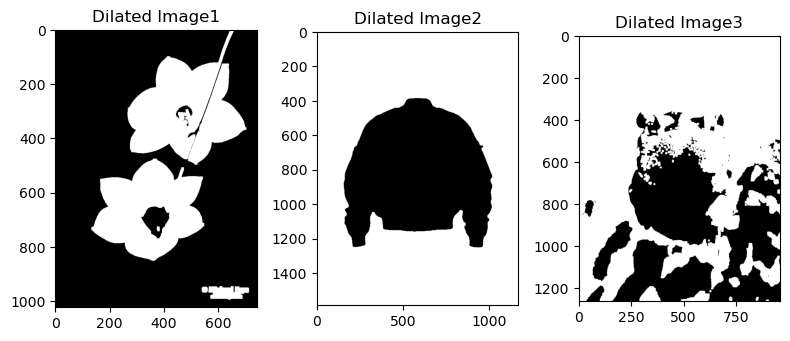

In [26]:
dilated_bin_image1 = cv2.dilate(binary1, morph_rect_se, iterations=2)
dilated_bin_image2= cv2.dilate(binary2, morph_rect_se, iterations=2)
dilated_bin_image3 = cv2.dilate(binary3, morph_rect_se, iterations=2)

plt.figure(figsize=(8, 5))
plt.subplot(131), plt.imshow(dilated_bin_image1, cmap='gray'), plt.title('Dilated Image1')
plt.subplot(132), plt.imshow(dilated_bin_image2, cmap='gray'), plt.title('Dilated Image2')
plt.subplot(133), plt.imshow(dilated_bin_image3, cmap='gray'), plt.title('Dilated Image3')

plt.tight_layout()
plt.show()

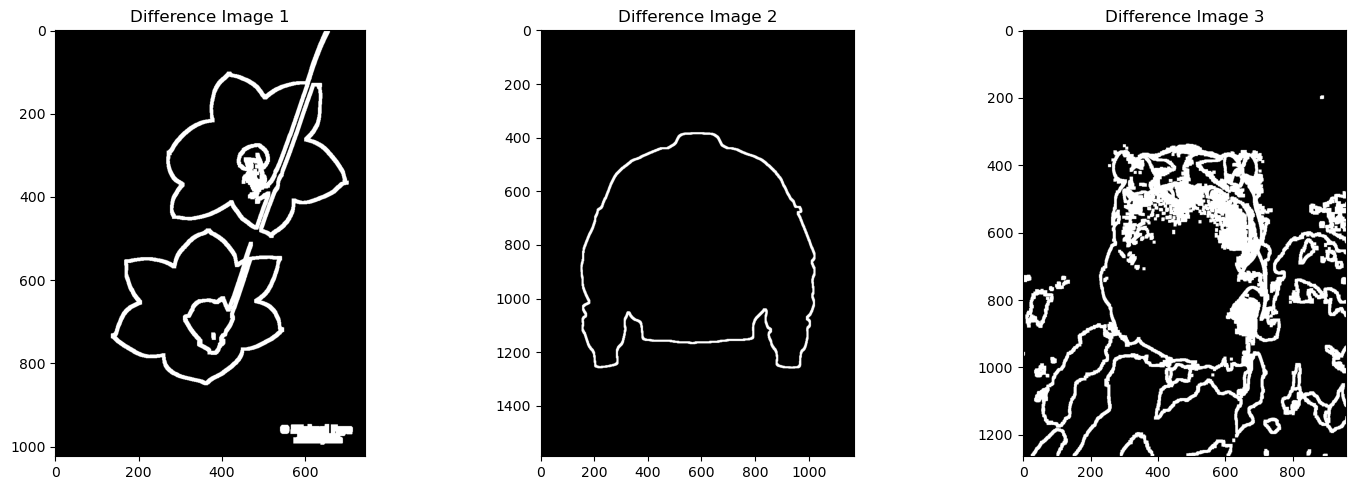

In [28]:
diff_eroded_dilated1 = cv2.absdiff(eroded_bin_image1, dilated_bin_image1)
diff_eroded_dilated2 = cv2.absdiff(eroded_bin_image2, dilated_bin_image2)
diff_eroded_dilated3 = cv2.absdiff(eroded_bin_image3, dilated_bin_image3)

plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(diff_eroded_dilated1, cmap='gray'), plt.title('Difference Image 1')
plt.subplot(132), plt.imshow(diff_eroded_dilated2, cmap='gray'), plt.title('Difference Image 2')
plt.subplot(133), plt.imshow(diff_eroded_dilated3, cmap='gray'), plt.title('Difference Image 3')

plt.tight_layout()
plt.show()


Erosion basically shrinks the objects and adds pixels to the boundry of the object. Dialation is the opossite, it expands the boundry by adding pizels to the object. Hence in the difference we can see the outline of each object. It is a great way to find boundries. Seperate background from foreground. It works well in the first 2 imageds where there is a perfect contrast between background and forefground. But in the third picture OI can see the hippo boundry as well as some waves in the background.  

## Part 2 – Opening and Closing

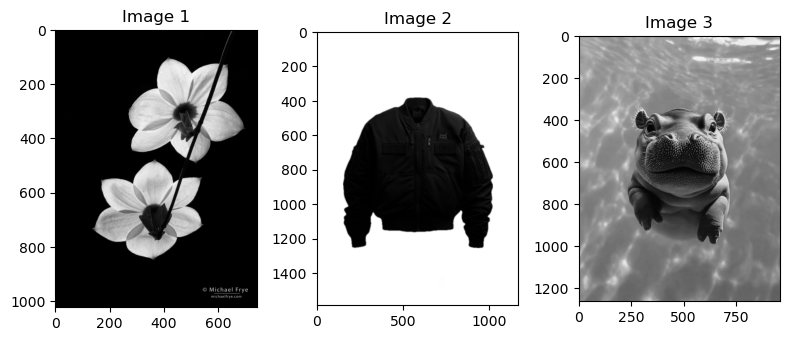

In [42]:
plt.figure(figsize=(8, 5))

plt.subplot(131), plt.imshow(image1_gray, cmap='gray'), plt.title('Image 1')
plt.subplot(132), plt.imshow(image2_gray, cmap='gray'), plt.title('Image 2')
plt.subplot(133), plt.imshow(image3_gray, cmap='gray'), plt.title('Image 3')

plt.tight_layout() 
plt.show()

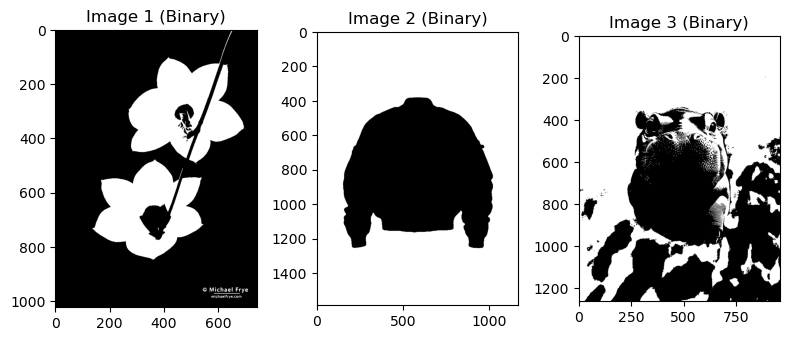

In [44]:
plt.figure(figsize=(8, 5))
plt.subplot(131), plt.imshow(binary1, cmap='gray'), plt.title('Image 1 (Binary)')
plt.subplot(132), plt.imshow(binary2, cmap='gray'), plt.title('Image 2 (Binary)')
plt.subplot(133), plt.imshow(binary3, cmap='gray'), plt.title('Image 3 (Binary)')

plt.tight_layout()
plt.show()

In [46]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

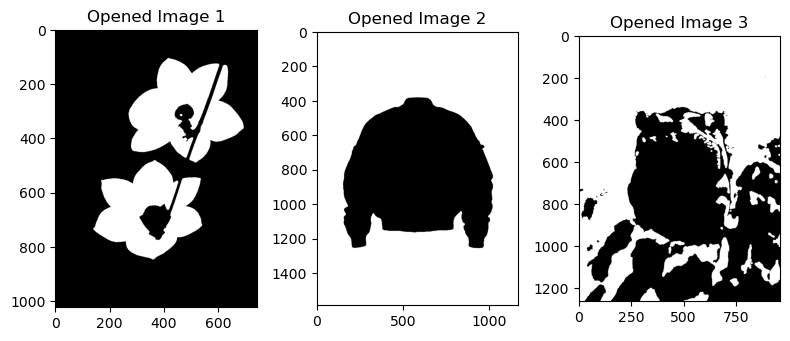

In [48]:
opened_image1 = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, se, iterations=2)
opened_image2 = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, se, iterations=2)
opened_image3 = cv2.morphologyEx(binary3, cv2.MORPH_OPEN, se, iterations=2)

plt.figure(figsize=(8, 5))

plt.subplot(131), plt.imshow(opened_image1, cmap='gray'), plt.title('Opened Image 1')
plt.subplot(132), plt.imshow(opened_image2, cmap='gray'), plt.title('Opened Image 2')
plt.subplot(133), plt.imshow(opened_image3, cmap='gray'), plt.title('Opened Image 3')

plt.tight_layout()
plt.show()

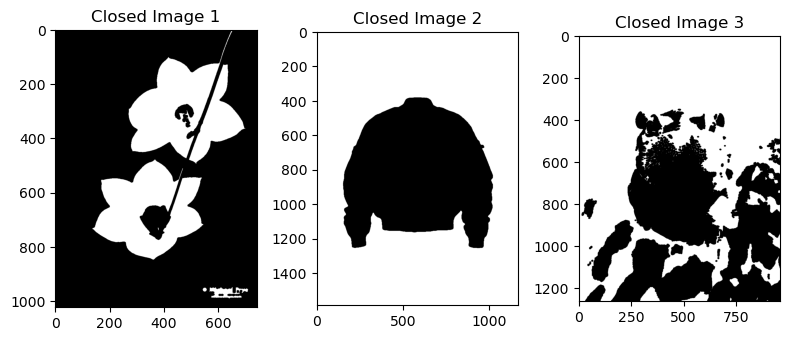

In [108]:
closed_image1 = cv2.morphologyEx(binary1, cv2.MORPH_CLOSE, se, iterations=2)
closed_image2 = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, se, iterations=2)
closed_image3 = cv2.morphologyEx(binary3, cv2.MORPH_CLOSE, se, iterations=2)

plt.figure(figsize=(8, 5))

plt.subplot(131), plt.imshow(closed_image1, cmap='gray'), plt.title('Closed Image 1')
plt.subplot(132), plt.imshow(closed_image2, cmap='gray'), plt.title('Closed Image 2')
plt.subplot(133), plt.imshow(closed_image3, cmap='gray'), plt.title('Closed Image 3')

plt.tight_layout()
plt.show()

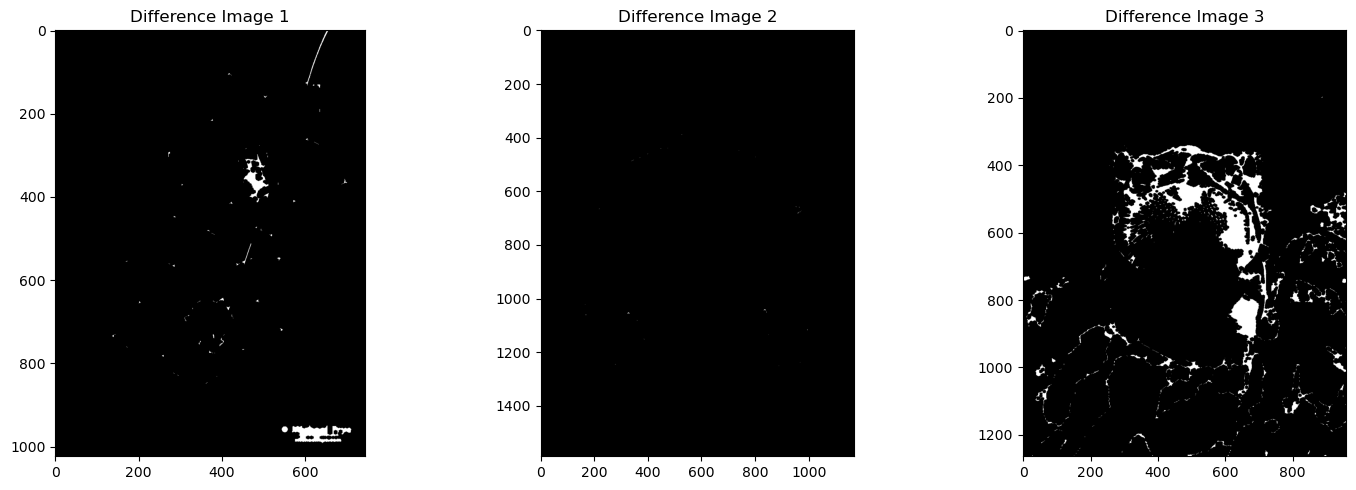

In [52]:
opened_minus_closed_image1 = cv2.absdiff(opened_image1, closed_image1)
opened_minus_closed_image2 = cv2.absdiff(opened_image2, closed_image2)
opened_minus_closed_image3 = cv2.absdiff(opened_image3, closed_image3)

plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(opened_minus_closed_image1, cmap='gray'), plt.title('Difference Image 1')
plt.subplot(132), plt.imshow(opened_minus_closed_image2, cmap='gray'), plt.title('Difference Image 2')
plt.subplot(133), plt.imshow(opened_minus_closed_image3, cmap='gray'), plt.title('Difference Image 3')

plt.tight_layout()
plt.show()


Opening basically shrinks the objects by first applying Erosion, which removes small noise and detaches thin connections. Then, Dilation is applied to restore the main shape of the object. In the difference, we can see that small noise and fine details have been removed while preserving the overall structure of the object. It is a great way to remove small background noise and refine object boundaries. It works well in the first two images where the noise is minimal and the objects are well-defined. However, in the third picture, I can see that while some noise has been removed, finer details of the object might also be affected.

Closing does the opposite—it first applies Dilation, which expands the object boundaries and fills small gaps, followed by Erosion to restore the shape. In the difference, we can see that small holes inside objects and tiny gaps in the boundaries have been filled, making the objects more solid. It is a great way to fill small gaps and reinforce object boundaries, ensuring a more complete segmentation. It works well in the first two images where the objects have small holes or breaks that need to be filled. However, in the third picture, while it helps strengthen the main object hippo, it might also merge small unwanted details, like waves in the background.

it adds less number of pixels in open and close so the diffrence barely shoes any outlines.

## Part 3 – Boundary Extraction

In [86]:
titles = ['Grayscale Image 1', 'Grayscale Image 2', 'Grayscale Image 3', 
          'Binary Image 1', 'Binary Image 2', 'Binary Image 3', 
          'Boundary Image 1', 'Boundary Image 2', 'Boundary Image 3',
          'Canny Edges Image 1', 'Canny Edges Image 2', 'Canny Edges Image 3']

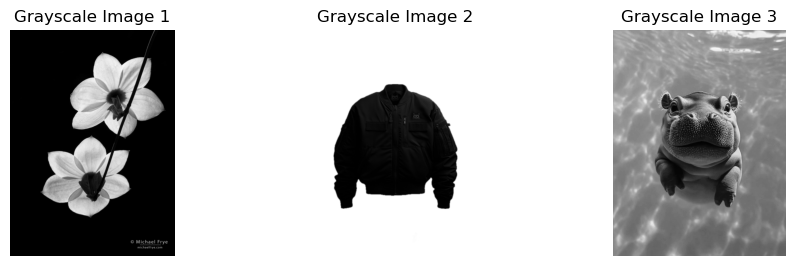

In [88]:
plt.figure(figsize=(15,10))
for i, img in enumerate([image1_gray, image2_gray, image3_gray]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')


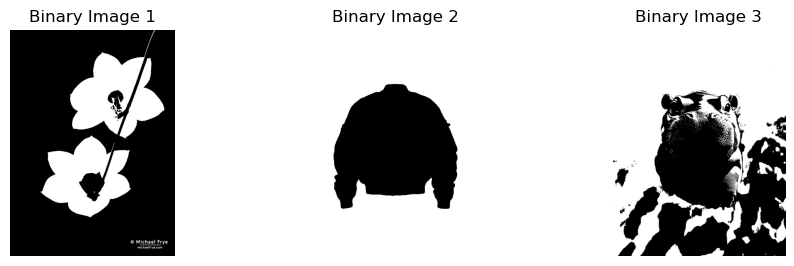

In [90]:
_, image1_binary = cv2.threshold(image1_gray, np.mean(image1_gray), 255, cv2.THRESH_BINARY)
_, image2_binary = cv2.threshold(image2_gray, np.mean(image2_gray), 255, cv2.THRESH_BINARY)
_, image3_binary = cv2.threshold(image3_gray, np.mean(image3_gray), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,10))
for i, img in enumerate([image1_binary, image2_binary, image3_binary]):
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[3 + i])
    plt.axis('off')

In [94]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

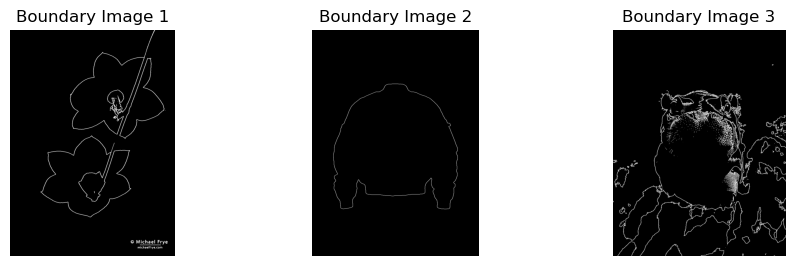

In [100]:
# Perform boundary extraction
image1_eroded = cv2.erode(image1_binary, se)
image1_boundary = cv2.subtract(image1_binary, image1_eroded)

image2_eroded = cv2.erode(image2_binary, se)
image2_boundary = cv2.subtract(image2_binary, image2_eroded)

image3_eroded = cv2.erode(image3_binary, se)
image3_boundary = cv2.subtract(image3_binary, image3_eroded)

plt.figure(figsize=(15,10))
for i, img in enumerate([image1_boundary, image2_boundary, image3_boundary]):
    plt.subplot(3, 4,   i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[6 + i])
    plt.axis('off')

In [102]:
image1_edges = cv2.Canny(image1_gray, 100, 200)
image2_edges = cv2.Canny(image2_gray, 100, 200)
image3_edges = cv2.Canny(image3_gray, 100, 200)

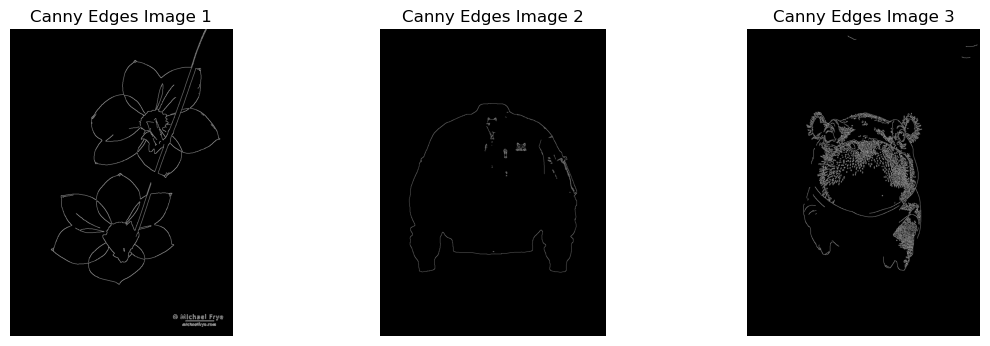

In [104]:
plt.figure(figsize=(15,10))
for i, img in enumerate([image1_edges, image2_edges, image3_edges]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[9 + i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Boundary extraction using erosion subtraction highlights the external outline of the object when there is a clear contrast between the background and foreground. However, in cases of low contrast, such as the image of the hippo with waves, the method also detects the waves as part of the boundary, leading to unwanted artifacts.

Canny edge detection, on the other hand, provides a more precise and effective way to detect edges. In the flower and jacket images, Canny preserves more internal details, such as the petal and sepal outlines, as well as the jacket’s zipper and other fine details, which are not as visible in the first method. Similarly, in the hippo image, Canny successfully detects the hippo’s outline without capturing the waves in the background, making it a more reliable choice for edge detection in low-contrast scenarios.